# **Carga de datos**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving MatriculasUniversidades.xlsx to MatriculasUniversidades.xlsx


# **Importación de librerías**

In [2]:
import pandas as pd                                                                        #Manipulacion de datos
import re                                                                                  #Operacion con expresiones regulares
import matplotlib.pyplot as plt                                                            #Visualizacion de datos
import numpy as np                                                                         #Calculos numericos
from sklearn.linear_model import LinearRegression                                          #SKLEARN - modelado y evaluacion de modelos de Machine Learning
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

# **Lectura y Exploración del Archivo**

In [3]:
datos = pd.read_excel('/content/MatriculasUniversidades.xlsx')

In [4]:
datos.head()

,CodigoInstitución,IES,PrincipaloSeccional,SectorIES,CaracterIES,CodigoDepartamento,DepartamentoDomicilio(IES),CodigoMunicipio,MunicipioDomicilio,CodigoPrograma(SNIES),...,Total 2012-1,Hombre 2012-2,Mujer 2012-2,Total 2012-2,Hombre 2013-1,Mujer 2013-1,Total 2013-1,Hombre 2013-2,Mujer 2013-2,Total 2013-2
0,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,PRINCIPAL,OFICIAL,UNIVERSIDAD,11,BOGOTA D.C.,11001,BOGOTA D.C.,1,...,120,81,26,107,98,31,129,48,25,73
1,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,PRINCIPAL,OFICIAL,UNIVERSIDAD,11,BOGOTA D.C.,11001,BOGOTA D.C.,2,...,3,26,25,51,24,28,52,31,17,48
2,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,PRINCIPAL,OFICIAL,UNIVERSIDAD,11,BOGOTA D.C.,11001,BOGOTA D.C.,3,...,54,30,21,51,32,21,53,25,16,41
3,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,PRINCIPAL,OFICIAL,UNIVERSIDAD,11,BOGOTA D.C.,11001,BOGOTA D.C.,4,...,30,19,10,29,29,6,35,21,9,30
4,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,PRINCIPAL,OFICIAL,UNIVERSIDAD,11,BOGOTA D.C.,11001,BOGOTA D.C.,5,...,49,30,14,44,34,19,53,24,19,43


In [5]:
datos.columns

Index(['CodigoInstitución', 'IES', 'PrincipaloSeccional', 'SectorIES',
       'CaracterIES', 'CodigoDepartamento', 'DepartamentoDomicilio(IES)',
       'CodigoMunicipio', 'MunicipioDomicilio', 'CodigoPrograma(SNIES)',
       ...
       'Total 2012-1', 'Hombre 2012-2', 'Mujer 2012-2', 'Total 2012-2',
       'Hombre 2013-1', 'Mujer 2013-1', 'Total 2013-1', 'Hombre 2013-2',
       'Mujer 2013-2', 'Total 2013-2'],
      dtype='object', length=103)

In [6]:
datos.describe()

,CodigoInstitución,CodigoDepartamento,CodigoMunicipio,CodigoPrograma(SNIES),Hombre 2000-1,Mujer 2000-1,Total 2000-1,Hombre 2000-2,Mujer 2000-2,Total 2000-2,...,Total 2012-1,Hombre 2012-2,Mujer 2012-2,Total 2012-2,Hombre 2013-1,Mujer 2013-1,Total 2013-1,Hombre 2013-2,Mujer 2013-2,Total 2013-2
count,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,...,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000,23891.000000
mean,3450.977690,21.384999,21455.847097,35536.657402,2.603030,2.548449,5.151480,1.990917,1.795237,3.786154,...,16.089908,6.333054,6.687916,13.020970,7.173496,7.657863,14.831359,8.158260,8.834749,16.993010
std,2777.157558,22.616680,22621.036999,35413.543821,13.804849,15.588165,26.680996,11.576605,11.650808,21.161347,...,60.878547,24.860115,34.543917,54.943589,25.085670,35.825390,55.434383,32.330178,45.973640,71.691424
min,1101.000000,5.000000,5001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1711.000000,11.000000,11001.000000,6130.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2102.000000,11.000000,11001.000000,15054.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3812.000000,17.000000,17001.000000,55143.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,3.000000,3.000000,8.000000,4.000000,3.000000,9.000000,4.000000,4.000000,10.000000
max,9906.000000,91.000000,91001.000000,102826.000000,506.000000,1107.000000,1283.000000,570.000000,672.000000,1008.000000,...,4394.000000,1516.000000,3157.000000,4673.000000,1185.000000,2167.000000,2910.000000,1135.000000,2271.000000,3214.000000


# **Entrenamiento de un Modelo de Regresión Lineal**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

datos = pd.read_excel('/content/MatriculasUniversidades.xlsx')

columnas_entrada = [col for col in datos.columns if 'Total' in col and '2013' not in col]
X = datos[columnas_entrada]
y = datos['Total 2013-2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f' Evaluación del Modelo:')
print(f' MAE: {mae:.2f}')
print(f' MSE: {mse:.2f}')
print(f' R² Score: {r2:.4f}')

if r2 > 0.7:
    X_prediccion = datos[columnas_entrada]
    prediccion_2014_1 = modelo.predict(X_prediccion).mean()

    print(f'📢 Predicción de Total Nacional 2014-1: {prediccion_2014_1:.0f} estudiantes')
else:
    print('⚠️ El modelo no es confiable para predecir 2014-1, se requiere ajuste.')


 Evaluación del Modelo:
 MAE: 15.08
 MSE: 3116.77
 R² Score: 0.2886
⚠️ El modelo no es confiable para predecir 2014-1, se requiere ajuste.


In [8]:
comparativa = {"Prediccion": y_pred, "Valor Real": y_test}
pd.DataFrame(comparativa)

,Prediccion,Valor Real
16341,3.411440,2
18596,4.222653,0
15483,3.468040,0
17177,3.411440,0
11974,77.277208,52
...,...,...
10011,3.705756,1
11142,5.143408,0
20964,24.208589,0
10430,5.038676,3


# **Entrenamiento de un Modelo Random Forest**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

datos = pd.read_excel('/content/MatriculasUniversidades.xlsx')

datos = datos.select_dtypes(include=['number'])

Y_2013_1 = datos['Total 2013-1']
Y_2013_2 = datos['Total 2013-2']

X = datos.drop(columns=['Total 2013-1', 'Total 2013-2'])

X_train, X_test, y_train_2013_1, y_test_2013_1 = train_test_split(X, Y_2013_1, test_size=0.2, random_state=42)
X_train, X_test, y_train_2013_2, y_test_2013_2 = train_test_split(X, Y_2013_2, test_size=0.2, random_state=42)

modelo_rf_2013_1 = RandomForestRegressor(n_estimators=200, random_state=42)
modelo_rf_2013_1.fit(X_train, y_train_2013_1)

modelo_rf_2013_2 = RandomForestRegressor(n_estimators=200, random_state=42)
modelo_rf_2013_2.fit(X_train, y_train_2013_2)

datos['Predicción 2013-1'] = modelo_rf_2013_1.predict(X)
datos['Predicción 2013-2'] = modelo_rf_2013_2.predict(X)

mae_2013_1 = mean_absolute_error(Y_2013_1, datos['Predicción 2013-1'])
mse_2013_1 = mean_squared_error(Y_2013_1, datos['Predicción 2013-1'])
r2_2013_1 = r2_score(Y_2013_1, datos['Predicción 2013-1'])

mae_2013_2 = mean_absolute_error(Y_2013_2, datos['Predicción 2013-2'])
mse_2013_2 = mean_squared_error(Y_2013_2, datos['Predicción 2013-2'])
r2_2013_2 = r2_score(Y_2013_2, datos['Predicción 2013-2'])

print(f' Evaluación del modelo para Total 2013-1:')
print(f' MAE: {mae_2013_1:.2f}')
print(f' MSE: {mse_2013_1:.2f}')
print(f' R² Score: {r2_2013_1:.4f}')
print('--------------------------------------')
print(f' Evaluación del modelo para Total 2013-2:')
print(f' MAE: {mae_2013_2:.2f}')
print(f' MSE: {mse_2013_2:.2f}')
print(f' R² Score: {r2_2013_2:.4f}')


datos.to_excel("predicciones_2013.xlsx", index=False)
print("Archivo 'predicciones_2013.xlsx' guardado con éxito.")


 Evaluación del modelo para Total 2013-1:
 MAE: 0.23
 MSE: 31.30
 R² Score: 0.9898
--------------------------------------
 Evaluación del modelo para Total 2013-2:
 MAE: 0.30
 MSE: 67.52
 R² Score: 0.9869
Archivo 'predicciones_2013.xlsx' guardado con éxito.


In [10]:
comparativa_2013_1 = pd.DataFrame({
    "Predicción 2013-1": modelo_rf_2013_1.predict(X_test),
    "Valor Real 2013-1": y_test_2013_1
})
pd.DataFrame(comparativa_2013_1)

,Predicción 2013-1,Valor Real 2013-1
16341,0.00,0
18596,0.00,0
15483,0.00,0
17177,6.01,6
11974,74.19,73
...,...,...
10011,1.00,1
11142,2.00,2
20964,0.00,0
10430,1.00,1


In [11]:
comparativa_2013_2 = pd.DataFrame({
    "Predicción 2013-2": modelo_rf_2013_2.predict(X_test),
    "Valor Real 2013-2": y_test_2013_2
})
pd.DataFrame(comparativa_2013_2)

,Predicción 2013-2,Valor Real 2013-2
16341,2.000,2
18596,0.000,0
15483,0.000,0
17177,0.000,0
11974,52.150,52
...,...,...
10011,1.000,1
11142,0.000,0
20964,0.000,0
10430,3.000,3


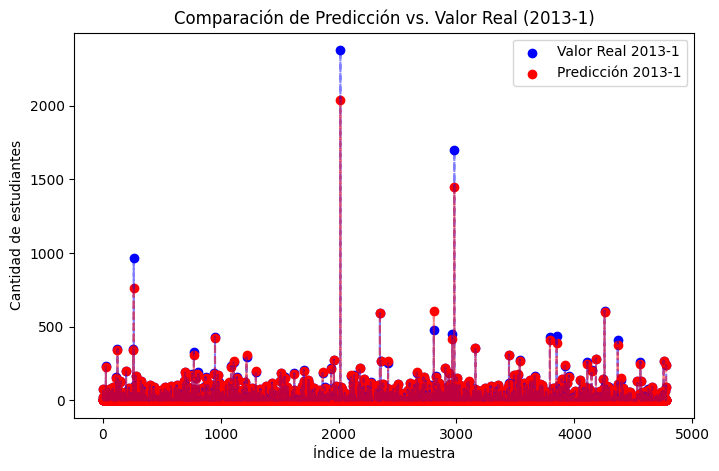

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test_2013_1)), y_test_2013_1, color='blue', label='Valor Real 2013-1')
plt.scatter(range(len(y_test_2013_1)), modelo_rf_2013_1.predict(X_test), color='red', label='Predicción 2013-1')
plt.plot(range(len(y_test_2013_1)), y_test_2013_1, color='blue', linestyle='dashed', alpha=0.5)
plt.plot(range(len(y_test_2013_1)), modelo_rf_2013_1.predict(X_test), color='red', linestyle='dashed', alpha=0.5)
plt.xlabel("Índice de la muestra")
plt.ylabel("Cantidad de estudiantes")
plt.title("Comparación de Predicción vs. Valor Real (2013-1)")
plt.legend()
plt.show()


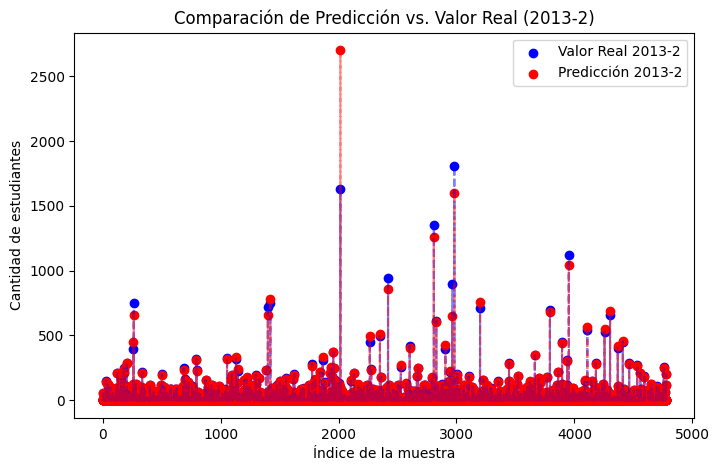

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test_2013_2)), y_test_2013_2, color='blue', label='Valor Real 2013-2')
plt.scatter(range(len(y_test_2013_2)), modelo_rf_2013_2.predict(X_test), color='red', label='Predicción 2013-2')
plt.plot(range(len(y_test_2013_2)), y_test_2013_2, color='blue', linestyle='dashed', alpha=0.5)
plt.plot(range(len(y_test_2013_2)), modelo_rf_2013_2.predict(X_test), color='red', linestyle='dashed', alpha=0.5)
plt.xlabel("Índice de la muestra")
plt.ylabel("Cantidad de estudiantes")
plt.title("Comparación de Predicción vs. Valor Real (2013-2)")
plt.legend()
plt.show()

In [14]:
import pandas as pd

columnas_modelo = modelo_rf_2013_1.feature_names_in_

X_prediccion = datos.drop(columns=['Total 2013-1', 'Total 2013-2'], errors='ignore')

datos['Total 2014-1 (Predicho)'] = modelo_rf_2013_1.predict(X_prediccion[columnas_modelo])

X_prediccion['Total 2014-1'] = datos['Total 2014-1 (Predicho)']

columnas_modelo_2013_2 = modelo_rf_2013_2.feature_names_in_

datos['Total 2014-2 (Predicho)'] = modelo_rf_2013_2.predict(X_prediccion[columnas_modelo_2013_2])

predicciones_2014 = datos[['Total 2014-1 (Predicho)', 'Total 2014-2 (Predicho)']]
print(predicciones_2014)

predicciones_2014.to_excel("Predicciones_2014.xlsx", index=False)
print(" Archivo 'Predicciones_2014.xlsx' generado con éxito.")


       Total 2014-1 (Predicho)  Total 2014-2 (Predicho)
0                      128.580                   72.785
1                       51.735                   47.345
2                       52.985                   40.900
3                       35.150                   29.855
4                       52.665                   42.935
...                        ...                      ...
23886                   69.050                   40.205
23887                    0.000                    5.000
23888                   16.960                    0.000
23889                    7.000                    1.000
23890                   60.840                   48.925

[23891 rows x 2 columns]
 Archivo 'Predicciones_2014.xlsx' generado con éxito.
